In [1]:
import umap
import pandas as pd
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

mrna = pd.read_csv("data/mRna_sorted_out.csv")
meth = pd.read_csv("data/methylation_sorted_out.csv")
mirna = pd.read_csv("data/mirna_sorted_out.csv")
cancer_genes = pd.read_csv("data/cancer_genes.csv", header = None)

In [2]:
class dimr:
    def __init__(self, data, genes):
        self.data = data
        self.genes = genes
    
    def algo_umap(self, n_neigh, min_dis):
        data = self.data.drop(['Unnamed: 0'], axis=1).T

        try:
            color_idx = pd.read_csv("color_idx.csv")
        except:
            color_idx = obj_train.process()
        
        umap_result = umap.UMAP(n_neighbors = n_neigh, min_dist = min_dis, metric = 'cosine').fit_transform(data)
        print("UMAP result shape", umap_result.shape)

        final_df = pd.DataFrame(umap_result, index=range(umap_result.shape[0]), columns=range(umap_result.shape[1]))
        final_df = pd.concat([final_df, color_idx], axis=1)
        final_df.columns = ['a', 'b', 'c']
        final_df.to_csv("final_df_meth.csv", index = None)
        plt.clf()
        plot = sns.scatterplot('a', 'b', data = final_df, legend = "full",alpha=0.1).set_title('umap-plot-dist_' + str(min_dis) + '___' + str(n_neigh) + '_')
        #plot.figure.savefig('plots/umap-plot-dist_'+ str(min_dist) + '___'+ str(n_neigh) + '.svg', format = 'svg', dpi = 1200)

        #plt.clf()
        df = final_df.loc[final_df['c']>=2] 

        plot = sns.scatterplot('a', 'b', data=df, hue = 'c', palette=['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black', 'blue', 'yellow']).set_title('umap-plot-genes_' + str(min_dis) + '___' + str(n_neigh) + '_')
        plot.figure.savefig('plots/umap-plot-genes_'+ str(min_dis) + '___'+ str(n_neigh) + '.svg', format = 'svg', dpi = 1200)
        
        #return df_subset
    
    def algo_tsne(self, perplex, met, iter):
        data = self.data.drop(['Unnamed: 0'], axis=1).T

        try:
            color_idx = pd.read_csv("color_idx.csv")
        except:
            color_idx = obj_train.process()
    
        tsne = TSNE(n_components=2, verbose=1, perplexity=perplex, metric = met, n_iter=iter)
        tsne_result = tsne.fit_transform(data)

        final_df = pd.DataFrame(tsne_result, index=range(tsne_result.shape[0]), columns=range(tsne_result.shape[1]))
        final_df = pd.concat([final_df, color_idx], axis=1)
        final_df.columns = ['a', 'b', 'c']
        final_df.to_csv("final_df_meth_tsne.csv", index = None)
        plt.clf()
        plot = sns.scatterplot('a', 'b', data = final_df, legend = "full",alpha=0.1).set_title('umap-plot-dist_' + str(perplex) + '___' + met + '_')
        #plot.figure.savefig('plots/tsne-plot-dist_'+ str(min_dist) + '___'+ str(n_neigh) + '.svg', format = 'svg', dpi = 1200)

        #plt.clf()
        df = final_df.loc[final_df['c']>=2] 

        plot = sns.scatterplot('a', 'b', data=df, hue = 'c', palette=['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black', 'blue', 'yellow']).set_title('umap-plot-genes_' + str(perplex) + '___' + met + '_')
        plot.figure.savefig('plots/tsne-plot-genes_'+ str(perplex) + '___'+ met + '.svg', format = 'svg', dpi = 1200)

    def process(self):
        patients = self.data.iloc[:][:]
        patients = patients.drop(['Unnamed: 0'], axis=1)
        #print(self.d.head())

        genes = self.genes.iloc[:][0]
        latent_loc = []
        for i in genes:
            try:
                location = self.data.columns.get_loc(i)      #get gene location
                latent_loc.append(location)
            except:
                print(i, "Not Located")                 
                latent_loc.append("Not Located")
                continue
        gene_loc = pd.DataFrame(latent_loc)

        a = self.genes.iloc[:][2]
        a = a.to_numpy()
        gene_loc[1] = pd.Series(a, index=gene_loc.index)
        gene_loc.drop([gene_loc.index[40],gene_loc.index[43]], inplace = True)
        gene_loc.reset_index(inplace = True)
        gene_loc = gene_loc.drop(columns=['index'])

        color_idx = pd.DataFrame(index=range(0, 20172),columns=range(1))

        for j in range(0, 82):
            print("step", j, "of 83")
            for i in range(0, 20172):
                if i == gene_loc.iloc[j][0]:
                    color_idx.iloc[i] = gene_loc.iloc[j][1]
                    break
                else:
                    continue
        color_idx = color_idx.fillna(1)
        color_idx.to_csv("color_idx.csv", index = None)
        return color_idx

    def run_umap(self):
        for i in (2, 3, 4, 5, 10, 15, 20 ,25, 30, 35, 40, 45, 50):
            for j in (0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8):
                obj_train.algo_umap(i, j)

    def run_tsne(self):
        obj_train.algo_tsne(7,"cosine", 5000)
          

In [3]:
obj_train = dimr(meth, cancer_genes)

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 17052 samples in 0.003s...
[t-SNE] Computed neighbors for 17052 samples in 4.928s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17052
[t-SNE] Computed conditional probabilities for sample 2000 / 17052
[t-SNE] Computed conditional probabilities for sample 3000 / 17052
[t-SNE] Computed conditional probabilities for sample 4000 / 17052
[t-SNE] Computed conditional probabilities for sample 5000 / 17052
[t-SNE] Computed conditional probabilities for sample 6000 / 17052
[t-SNE] Computed conditional probabilities for sample 7000 / 17052
[t-SNE] Computed conditional probabilities for sample 8000 / 17052
[t-SNE] Computed conditional probabilities for sample 9000 / 17052
[t-SNE] Computed conditional probabilities for sample 10000 / 17052
[t-SNE] Computed conditional probabilities for sample 11000 / 17052
[t-SNE] Computed conditional probabilities for sample 12000 / 17052
[t-SNE] Computed conditional probabilities for sam

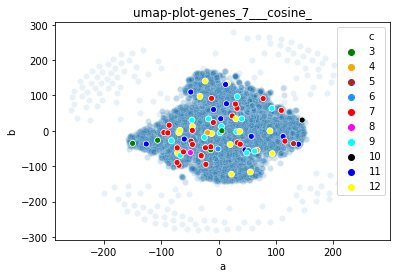

In [4]:
obj_train.run_tsne()